This notebook converts audio samples `.npy` in diretory `./drumData`  into MFCC features located in `./drumFeatures`. Output dimensions per file is (30,24)

In [19]:
%matplotlib inline
from os.path import join
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa
from tqdm import tqdm

In [2]:
data_root = 'drumData'

# Load audio files

In [3]:
drumNames = ["kick", "tom", "snare", "clap", "hi.hat", "ride", "crash"]
drumFingerPrints = {}
drumSamples = {}
for d in drumNames:
    %time drumSamples[d] = np.load(join(data_root, d+'_samples.npy'))

CPU times: user 931 µs, sys: 123 ms, total: 124 ms
Wall time: 123 ms
CPU times: user 838 µs, sys: 10.1 ms, total: 10.9 ms
Wall time: 10.6 ms
CPU times: user 631 µs, sys: 59.9 ms, total: 60.5 ms
Wall time: 60.3 ms
CPU times: user 673 µs, sys: 31.6 ms, total: 32.2 ms
Wall time: 32 ms
CPU times: user 630 µs, sys: 4.72 ms, total: 5.35 ms
Wall time: 5.3 ms
CPU times: user 741 µs, sys: 6.09 ms, total: 6.83 ms
Wall time: 6.7 ms
CPU times: user 565 µs, sys: 17.1 ms, total: 17.7 ms
Wall time: 17.6 ms


### Inspect some file samples

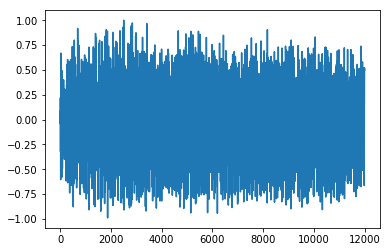

In [8]:
crashes = drumSamples["crash"]
kicks = drumSamples["kick"]
plt.plot(crashes[10])

### Sanity check output dimensions are what we expect

In [14]:
test_crash = crashes[10]
test_crash_mfcc = librosa.feature.mfcc(test_crash,n_mfcc=30,sr=48000)
print(test_crash_mfcc.shape)

(30, 24)


# Extract MFCC's and save as .npy

In [24]:
drumNames = ["kick", "tom", "snare", "clap", "hi.hat", "ride", "crash"]
for drumName in tqdm(drumNames):
    samples = drumSamples[drumName] 
    samples_mfcc = []
    (num_samples, sample_length) = samples.shape # e.g samples.shape=(672,12000)
    for i in tqdm(range(num_samples)):
        sample = samples[i]
        sample_mfcc = librosa.feature.mfcc(sample,n_mfcc=30,sr=48000)
        samples_mfcc.append(sample_mfcc)
    samples_mfcc = np.asarray(samples_mfcc)
    print (drumName, samples_mfcc.shape)  
    file_path = './drumfeatures/' + drumName + '_mfcc.npy'
    np.save(file_path, samples_mfcc)

 89%|████████▊ | 4567/5158 [00:31<00:03, 161.76it/s]


  4%|▍         | 16/422 [00:00<00:02, 152.25it/s]

('kick', (5158, 30, 24))



  1%|          | 14/2546 [00:00<00:18, 135.79it/s]

('tom', (422, 30, 24))



  1%|          | 15/1324 [00:00<00:08, 149.69it/s]

('snare', (2546, 30, 24))



 10%|█         | 16/159 [00:00<00:00, 151.98it/s]

('clap', (1324, 30, 24))



  6%|▌         | 14/228 [00:00<00:01, 138.14it/s]

('hi.hat', (159, 30, 24))



  2%|▏         | 12/723 [00:00<00:06, 112.76it/s]

('ride', (228, 30, 24))



100%|██████████| 7/7 [01:12<00:00,  8.61s/it]it/s]

('crash', (723, 30, 24))
